<a href="https://colab.research.google.com/github/aamgoulart/heart-failure-analysis/blob/main/Trabalho_final_Prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
R.version.string

[1] "R version 4.2.0 (2022-04-22)"

In [ ]:
require(ggplot2)
require(dplyr)
require(readr)
require(summarytools)
require(readr)

Loading required package: summarytools

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘summarytools’”


In [ ]:
heart_data <- read.csv("/content/heart_failure_clinical_records_dataset.csv")

In [ ]:
heart_data <- heart_data %>%
  mutate(sex = ifelse(sex == 0,"Feminino","Masculino"))

heart_data <- heart_data %>%
  mutate(anaemia = ifelse(anaemia == 0,"Não tem anêmia","Anêmico"))

heart_data <- heart_data %>%
  mutate(smoking = ifelse(smoking == 0,"Não fumante","Fumante"))

heart_data <- heart_data %>%
  mutate(DEATH_EVENT = ifelse(DEATH_EVENT == 0,"Saudável","Sofreu ataque cardíaco"))

# Sexo dos pacientes - Pie chart  


In [ ]:
var_sexo <- heart_data$sex
df_sexo <- as.data.frame(table(var_sexo))
df_sexo$per <- c((table(var_sexo)/length(var_sexo)*100))
df_sexo <- df_sexo %>% 
  arrange(desc(var_sexo)) %>%
  mutate(prop = Freq / sum(df_sexo$Freq) *100) %>%
  mutate(ypos = cumsum(prop)- 0.5*prop )


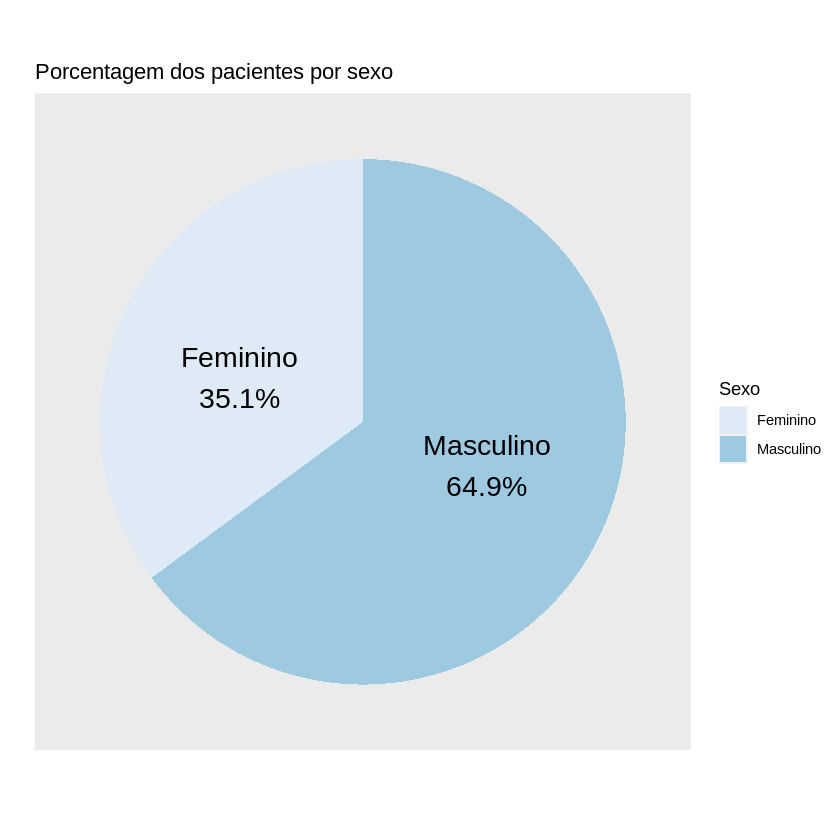

In [ ]:
pie <- ggplot(df_sexo, aes(x="", y=per, fill=var_sexo))+
  geom_bar(width = 1, stat = "identity")+ coord_polar("y", start=0) +
  scale_fill_brewer(palette="Blues") +
  theme(panel.grid = element_blank(),
        axis.ticks = element_blank(),
        axis.text =element_blank(),
        panel.border = element_blank()) +
  geom_text(aes(y = ypos-2, label = paste(var_sexo, scales::percent(per/100, accuracy = .1), sep = "\n")), color = "black", size=6) +
  scale_y_continuous(name="") +
  scale_x_discrete(name="") +
  ggtitle("Porcentagem dos pacientes por sexo") +
  labs(fill='Sexo')

pie

#   Anêmia e fumar - Bar plot

In [ ]:
value <- c(
  sum(heart_data['smoking']=='Fumante' & heart_data['anaemia']=='Anêmico'),
  sum(heart_data['smoking']=='Fumante' & heart_data['anaemia']=='Não tem anêmia'),
  sum(heart_data['smoking']=='Não fumante' & heart_data['anaemia']=='Anêmico'),
  sum(heart_data['smoking']=='Não fumante' & heart_data['anaemia']=='Não tem anêmia')
)
value2 <- c (
  round(sum(heart_data['smoking']=='Fumante' & heart_data['anaemia']=='Anêmico')/sum(heart_data['anaemia']=='Anêmico'), 2),
  round(sum(heart_data['smoking']=='Fumante' & heart_data['anaemia']=='Não tem anêmia')/sum(heart_data['anaemia']=='Não tem anêmia'),2),
  round(sum(heart_data['smoking']=='Não fumante' & heart_data['anaemia']=='Anêmico')/sum(heart_data['anaemia']=='Anêmico'),
2),
  round(sum(heart_data['smoking']=='Não fumante' & heart_data['anaemia']=='Não tem anêmia')/sum(heart_data['anaemia']=='Não tem anêmia'),2)
)
condition <- rep(c('Não tem anêmia', 'Anêmico') , 2)
var_smoking <- c(rep("Fumante" , 2) , rep("Não fumante" , 2))
df_smoking_and_anaemia <- data.frame(var_smoking,condition,value, value2)

Warning message:
“Ignoring unknown parameters: stat”


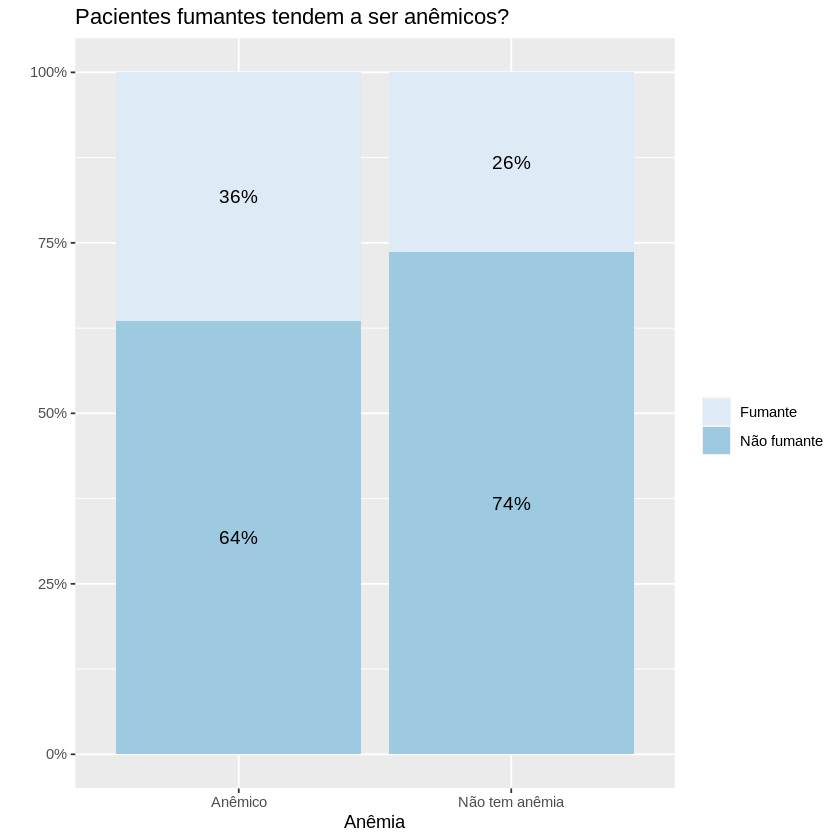

In [ ]:
ggplot(df_smoking_and_anaemia, aes(fill=var_smoking, y=value, x=condition)) + 
  geom_col(position="fill", stat="identity")+
  geom_text(aes(label=paste(value2*100, "%", sep="")), position = position_fill(vjust = 0.5), color="black", size=4) +
  scale_fill_brewer(palette="Blues") +
  ggtitle("Pacientes fumantes tendem a ser anêmicos?") +
  xlab("Anêmia") + 
  ylab("") + 
  guides(fill=guide_legend(title="")) +
  scale_y_continuous(labels = scales::percent)

#   Idade  - box plot


Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


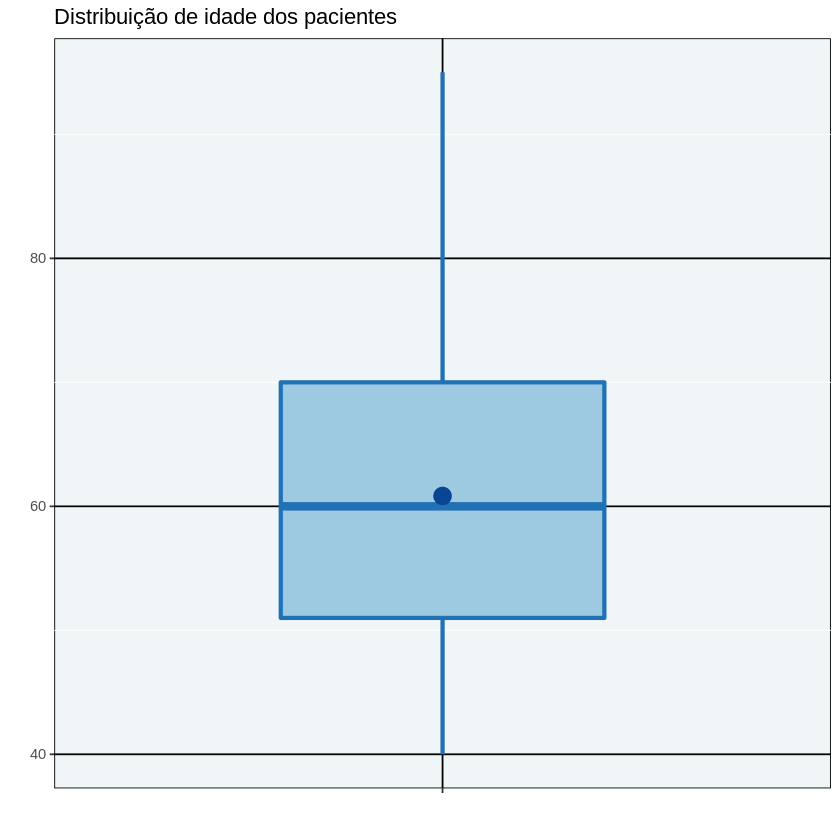

In [ ]:
var_idade <- data.frame(heart_data$age)

ggplot(var_idade, aes(x="", y=heart_data.age)) + 
  geom_boxplot(alpha=1, colour="#2171B5", fill="#9ECAE1", size=1.2, width=0.5) +
  stat_summary(fun.y=mean, geom="point", shape=20, size=7, color="#084594", fill="#084594") +
  theme(
    panel.background = element_rect(fill = '#f0f6f7', colour="black"),
    panel.grid.major = element_line(size = 0.5, linetype = 'solid',
                                    colour = "black"))+
  ggtitle("Distribuição de idade dos pacientes") +
  xlab("") + 
  ylab("")

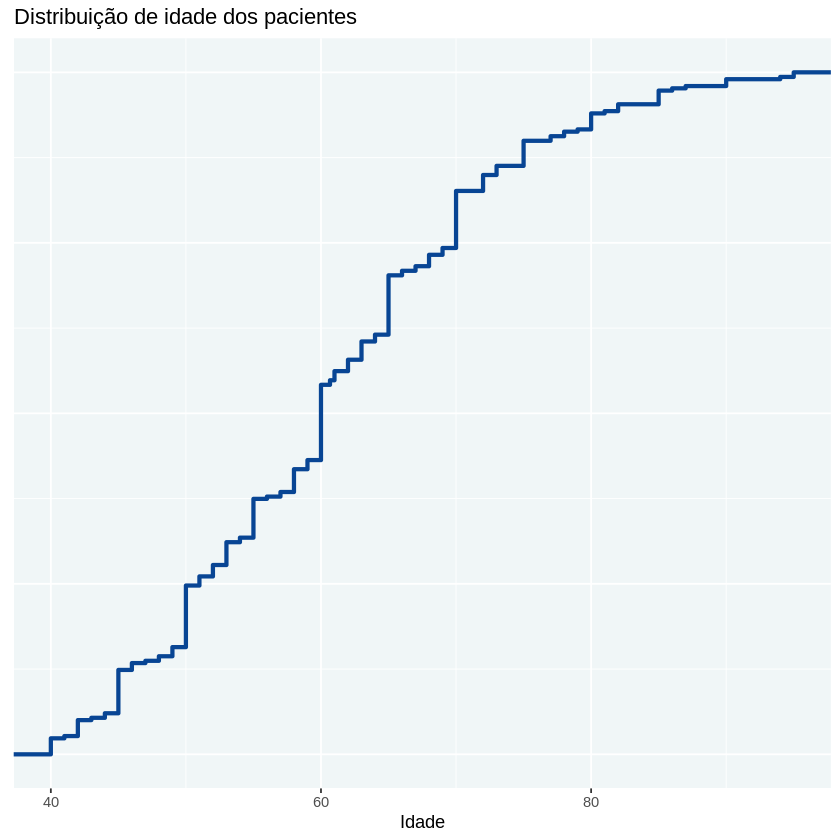

In [ ]:
ggplot(var_idade, aes(heart_data.age)) +                     
  stat_ecdf(geom = "step",size=1.2, colour="#084594")+
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
  ggtitle("Distribuição de idade dos pacientes") +
  xlab("Idade") +
  theme(panel.background = element_rect(fill = '#f0f6f7'))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



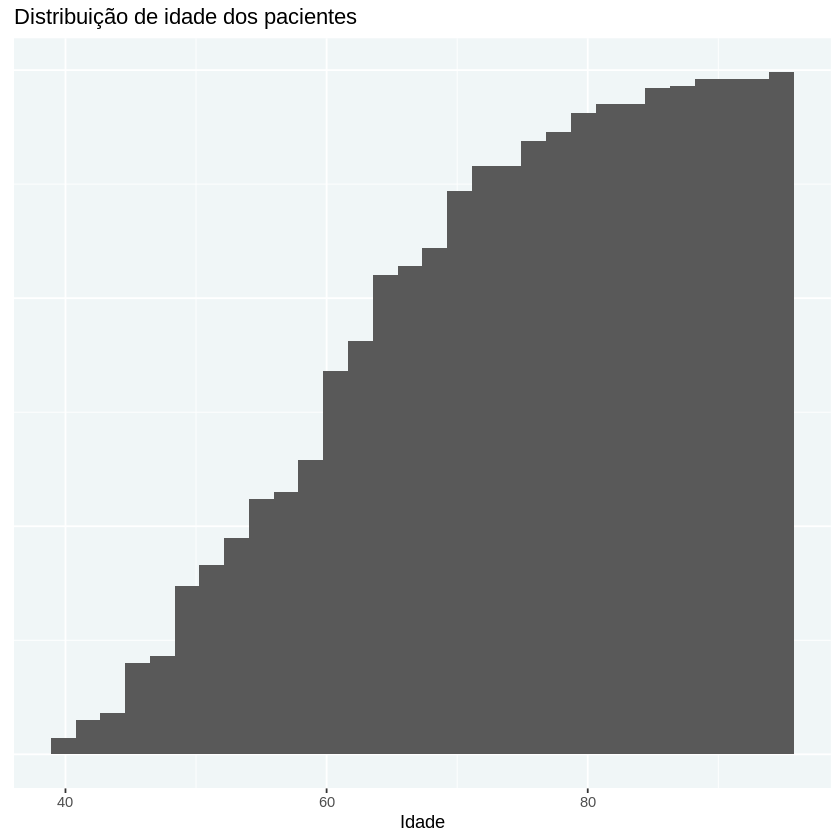

In [ ]:
ggplot(var_idade, aes(heart_data.age)) +                     
  geom_histogram(aes(y = cumsum(..count..)))+
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
  ggtitle("Distribuição de idade dos pacientes") +
  xlab("Idade") +
  theme(panel.background = element_rect(fill = '#f0f6f7'))